# Occupant Behavior Analysis

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Status overview & Dataframe Preparation

In [121]:
Behav = pd.read_csv('/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/Behavior_Study/0700_Behav.csv')

#for 5,8,7,9 to rename br1 to br3

Behav.rename(columns={'t_br1':'t_br3','rh_br1':'rh_br3','co2_br1':'co2_br3','con_br1':'con_br3','wc_br1':'wc_br3'}, inplace=True)

In [122]:
#Convert ventilation pulse to ventilation setting level

def vent_level(x):
    if x < 5.5:
        x = 1
    elif x > 9:
        x = 3
    else:
        x= 2
        
    return x

vl = Behav.pulse_channel_ventilation_unit.apply(vent_level)
Behav['set_vent_level'] = vl
Behav = Behav.drop('pulse_channel_ventilation_unit',axis = 1)


In [123]:
# Remap string t and f to 1 and 0, for the consequent classifying

def remap(x):
    if x == 't':
        x = 1
    else:
        x = 0
    return x

for col in ['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic']:
    w = Behav[col].apply(remap)
    Behav[col] = w

In [124]:
#Drop rows with missing value

Behav = Behav.dropna()

In [125]:
Behav.describe()

,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,rh_br2,...,wc_lr,wc_kitchen,wc_br3,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,set_vent_level
count,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,...,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000,225740.000000
mean,21.635425,42.714726,784.592128,4.717084,21.541957,41.916119,721.069508,4.716519,24.320392,35.713295,...,0.999942,0.998095,0.207181,0.999362,0.999841,1.916896,119.894954,78.701019,11.610559,1.004013
std,4.413472,13.081800,279.843107,1.112318,4.482640,12.659074,249.158604,1.112230,6.888957,13.166486,...,0.007588,0.043603,0.405287,0.025249,0.012627,1.682776,199.264739,15.625114,6.862696,0.069180
min,4.060000,0.000000,-0.400000,-0.000200,4.550000,0.000000,-0.400000,-0.000200,4.830000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-576.000000,0.000000,-90.000000,1.000000
25%,21.330000,37.900000,670.000000,4.978700,20.640000,37.860000,593.700000,4.978100,21.120000,27.710000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-4.000000,69.000000,6.800000,1.000000
50%,22.240000,44.140000,762.600000,4.979500,21.760000,43.250000,677.700000,4.978900,22.870000,36.880000,...,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,82.000000,11.600000,1.000000
75%,23.620000,51.120000,910.000000,4.980100,23.900000,49.770000,923.700000,4.979500,30.460000,44.740000,...,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,173.000000,91.000000,16.500000,1.000000
max,43.650000,69.310000,4784.900000,4.981400,44.010000,66.630000,4767.500000,4.980900,37.860000,63.890000,...,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,957.000000,100.000000,34.300000,3.000000


(0, 250000)

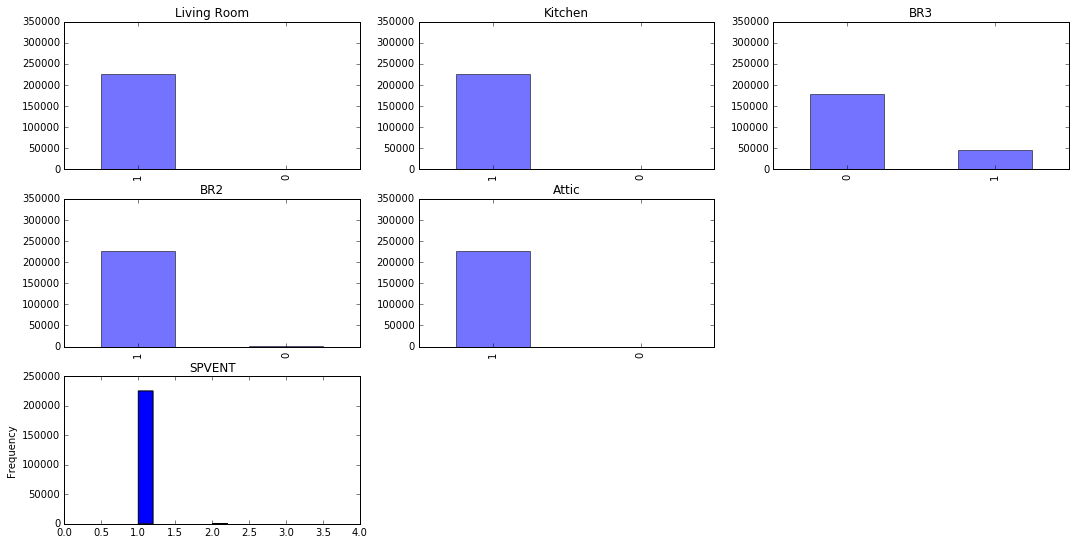

In [126]:
# some statistics
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,9), dpi=1600) 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((3,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_lr.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Living Room')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax2 = plt.subplot2grid((3,3),(0,1))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_kitchen.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Kitchen')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax3 = plt.subplot2grid((3,3),(0,2))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_br3.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('BR3')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax4 = plt.subplot2grid((3,3),(1,0))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_br2.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('BR2')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax5 = plt.subplot2grid((3,3),(1,1))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_attic.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Attic')
plt.ylim(0,350000)

ax5 = plt.subplot2grid((3,3),(2,0))
# plots a bar graph of those who surived vs those who did not.               
Behav.set_vent_level.plot(kind='hist')
plt.title('SPVENT')
plt.xlim(0,4)
plt.ylim(0,250000)

In [127]:
#generate month/hour attribute from datetime string

Behav.dt = pd.to_datetime(Behav.dt)
t = pd.DatetimeIndex(Behav.dt)
hr = t.hour
Behav['HourOfDay'] = hr
month = t.month
Behav['Month'] = month
dt = Behav.pop('dt')

In [128]:
#Rename weather attributes, easier for distinguish
Behav.rename(columns={'avg_t':'outside_temperature','avg_rh':'outside_humidity'}, inplace=True)
for column in Behav.columns:
    print column

t_lr
rh_lr
co2_lr
con_lr
t_br3
rh_br3
co2_br3
con_br3
t_br2
rh_br2
co2_br2
con_br2
t_supply_air_after_ventilation_unit
wc_lr
wc_kitchen
wc_br3
wc_br2
wc_attic
avg_windspeed
avg_irradiation
outside_humidity
outside_temperature
set_vent_level
HourOfDay
Month


In [129]:
#Behav.to_csv('/Users/xinyuyangren/Desktop/Behave10.csv',delimiter=",", index=True)

Run Above here to pre-process the dataset

# Set Point Ventilation Level: Motivation Study

In [20]:
SPV = Behav.pop('set_vent_level')

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [22]:
#Build a random forest with 1000 decision trees
rf_v = RandomForestClassifier(n_estimators=1000,n_jobs=-1,oob_score=True)

In [23]:
rf_v.fit(Behav,SPV)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [24]:
#out-of-bag score, which is equivalent to test set accuracy
print rf_v.oob_score_

0.923851461609


t_lr                                   0.040127
rh_lr                                  0.058550
co2_lr                                 0.026265
con_lr                                 0.064421
t_br3                                  0.077888
rh_br3                                 0.043585
co2_br3                                0.026953
con_br3                                0.057604
t_br2                                  0.146454
rh_br2                                 0.047000
co2_br2                                0.028484
con_br2                                0.064859
t_supply_air_after_ventilation_unit    0.101608
wc_lr                                  0.000478
wc_kitchen                             0.000031
wc_br3                                 0.005534
wc_br2                                 0.004423
wc_attic                               0.000661
avg_windspeed                          0.008057
avg_irradiation                        0.024383
outside_humidity                       0

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


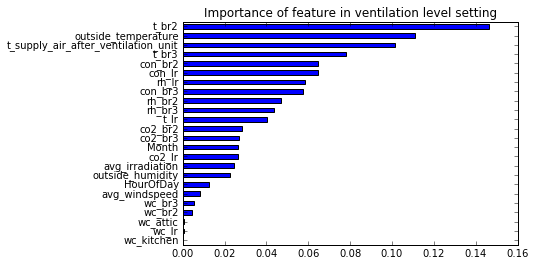

In [25]:
# This feature_importances implies how imformative certain attribute is in the classifying process
# (By calculating the error reduction with each attribute)

feature_importances_v = pd.Series(rf_v.feature_importances_,index = Behav.columns)
print feature_importances_v
feature_importances_v.sort(inplace = True)
feature_importances_v.plot(kind = 'barh',title = 'Importance of feature in ventilation level setting')


0.794924823643 0.0390339922256 0.166041184131


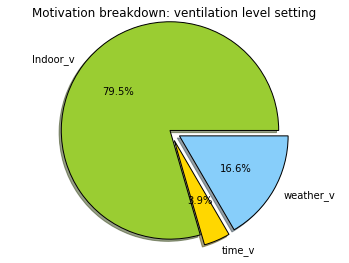

In [26]:
# Motivation breakdown

weather_v = feature_importances_v.outside_temperature + feature_importances_v.outside_humidity\
+ feature_importances_v.avg_windspeed + feature_importances_v.avg_irradiation

time_v = feature_importances_v.Month + feature_importances_v.HourOfDay

Indoor_v = 1 - time_v - weather_v

print Indoor_v, time_v, weather_v

# The slices will be ordered and plotted counter-clockwise.
labels = 'Indoor_v', 'time_v', 'weather_v'
sizes = [Indoor_v, time_v, weather_v]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0.1, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.title('Motivation breakdown: ventilation level setting')
plt.show()

# Bedroom 3 Window Operation: Motivation Study

In [27]:
Behav = pd.concat([Behav,SPV],axis = 1)

In [28]:
wc = Behav.pop('wc_br3')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [30]:
rf_w = RandomForestClassifier(n_estimators=1000,n_jobs=-1,oob_score=True)

In [31]:
rf_w.fit(Behav,wc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [32]:
#out-of-bag score, which is equivalent to test set accuracy
print rf_w.oob_score_

0.999734141706


t_lr                                   0.042723
rh_lr                                  0.066541
co2_lr                                 0.027707
con_lr                                 0.015534
t_br3                                  0.123040
rh_br3                                 0.156897
co2_br3                                0.120861
con_br3                                0.015226
t_br2                                  0.056860
rh_br2                                 0.067446
co2_br2                                0.023568
con_br2                                0.015449
t_supply_air_after_ventilation_unit    0.020636
wc_lr                                  0.000332
wc_kitchen                             0.000616
wc_br2                                 0.004361
wc_attic                               0.004051
avg_windspeed                          0.013183
avg_irradiation                        0.013642
outside_humidity                       0.019397
outside_temperature                    0

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


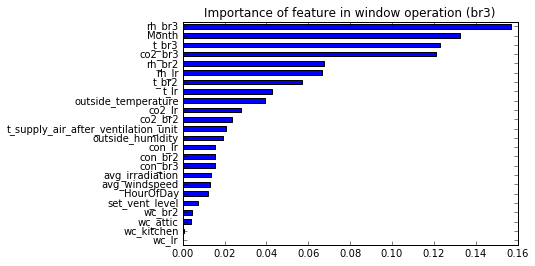

In [33]:
# This feature_importances implies how imformative certain attribute is in the classifying process
# (By calculating the error reduction with each attribute)

feature_importances_w = pd.Series(rf_w.feature_importances_,index = Behav.columns)
print feature_importances_w
feature_importances_w.sort(inplace = True)
feature_importances_w.plot(kind = 'barh',title = 'Importance of feature in window operation (br3)')

0.769354130771 0.144878257622 0.0857676116067


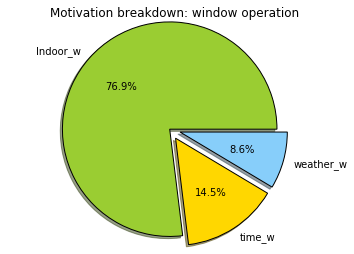

In [34]:
# Motivation breakdown

weather_w = feature_importances_w.outside_temperature + feature_importances_w.outside_humidity\
+ feature_importances_w.avg_windspeed + feature_importances_w.avg_irradiation

time_w = feature_importances_w.Month + feature_importances_w.HourOfDay

Indoor_w = 1 - time_w - weather_w

print Indoor_w, time_w, weather_w

# The slices will be ordered and plotted counter-clockwise.
labels = 'Indoor_w', 'time_w', 'weather_w'
sizes = [Indoor_w, time_w, weather_w]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0.1, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.title('Motivation breakdown: window operation')
plt.show()

# Indoor Temp. Setting: Motivation Study

In [35]:
Behav = pd.concat([Behav,wc],axis = 1)

In [36]:
avg_t = (Behav['t_lr']+Behav['t_br3']+Behav['t_br2'])/3

In [37]:
Behav = Behav.drop(['t_lr','t_br3','t_br2'],axis = 1)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [39]:
rf_t = RandomForestRegressor(n_estimators=500,n_jobs=-1,oob_score=True)

In [40]:
rf_t.fit(Behav,avg_t)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [41]:
pred = rf_t.predict(Behav)

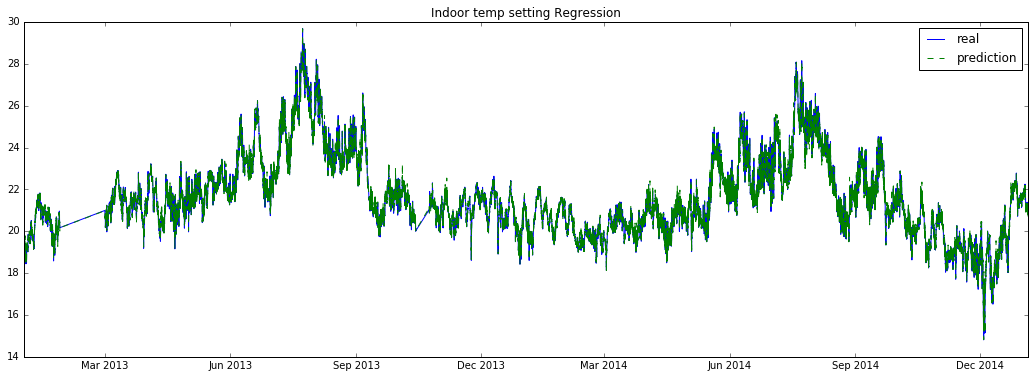

In [42]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
plt.plot(dt.reset_index(drop=True),avg_t,) 
plt.plot(dt.reset_index(drop=True),pred,'--') 
plt.ylim(14,30)
plt.legend(('real','prediction'),loc='best') 
plt.title('Indoor temp setting Regression')

rh_lr                                  0.019436
co2_lr                                 0.002626
con_lr                                 0.416002
rh_br3                                 0.008293
co2_br3                                0.006517
con_br3                                0.327587
rh_br2                                 0.004436
co2_br2                                0.002350
con_br2                                0.068168
t_supply_air_after_ventilation_unit    0.076737
wc_lr                                  0.000411
wc_kitchen                             0.000002
wc_br2                                 0.002584
wc_attic                               0.005586
avg_windspeed                          0.002089
avg_irradiation                        0.004374
outside_humidity                       0.003002
outside_temperature                    0.014523
HourOfDay                              0.004010
Month                                  0.014698
set_vent_level                         0

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


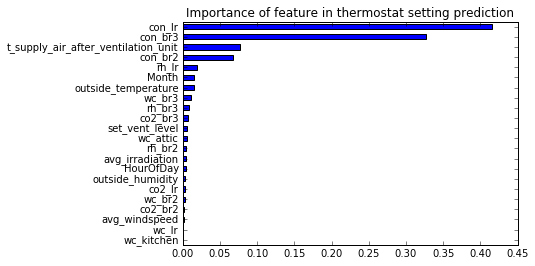

In [43]:
# This feature_importances implies how imformative certain attribute is in the classifying process
# (By calculating the error reduction with each attribute)

feature_importances_t = pd.Series(rf_t.feature_importances_,index = Behav.columns)
print feature_importances_t
feature_importances_t.sort(inplace = True)
feature_importances_t.plot(kind = 'barh',title = 'Importance of feature in thermostat setting prediction')

0.957303233852 0.0187081336362 0.0239886325122


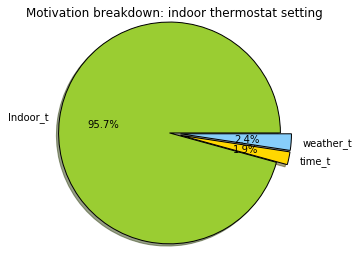

In [44]:
# Motivation breakdown

weather_t = feature_importances_t.outside_temperature + feature_importances_t.outside_humidity\
+ feature_importances_t.avg_windspeed + feature_importances_t.avg_irradiation

time_t = feature_importances_t.Month + feature_importances_t.HourOfDay

Indoor_t = 1 - time_t - weather_t

print Indoor_t, time_t, weather_t

# The slices will be ordered and plotted counter-clockwise.
labels = 'Indoor_t', 'time_t', 'weather_t'
sizes = [Indoor_t, time_t, weather_t]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0.1, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.title('Motivation breakdown: indoor thermostat setting')
plt.show()